# Grip at The Sparks Foundation
## Task 1: Prediction Using Supervised ML
### By: Tushar Kumar
### Dataset: student_scores.csv


### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [3]:
df = pd.read_csv('student_scores.csv')

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.shape

(25, 2)

In [7]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

# EDA

Let's create some simple plots to check out the data!

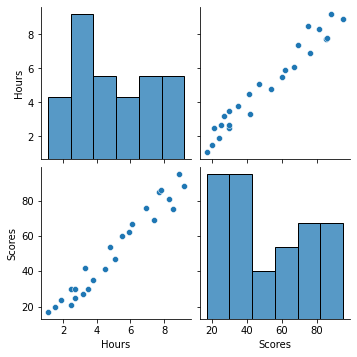

In [8]:
sns.pairplot(df)

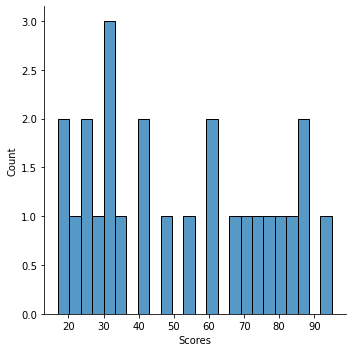

In [9]:
sns.displot(x='Scores',data=df,bins=24)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

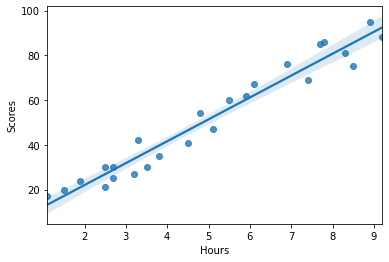

In [10]:
sns.regplot(x='Hours',y='Scores',data=df)

# Correlation shoes the strenght of relationship between two variables expressed numerically by the correlation coefficient

<AxesSubplot:>

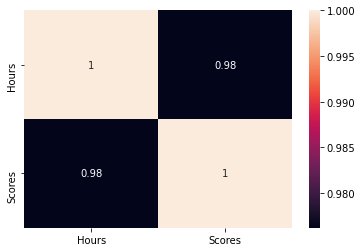

In [11]:
sns.heatmap(df.corr(),annot=True)

# Preparing the Data

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Score column.

### X and y arrays

In [12]:
X = df.iloc[:,:1].values
y = df['Scores'].values
print('X',X)
print('y',y)

X [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [13]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

## Creating and Training the Model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [32]:
# print the intercept
print(lm.intercept_)

3.0397190483256935


In [33]:
lm.coef_

array([9.62160558])

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [34]:
predictions = lm.predict(X_test)
predictions

array([88.67200871, 29.01805411, 69.42879755, 39.60182025, 13.62348519,
       46.33694416, 82.89904536])

In [35]:
Comparing_Predictions = pd.DataFrame({'Actual':y_test,'Predicted':predictions}) 
Comparing_Predictions

,Actual,Predicted
0,95,88.672009
1,30,29.018054
2,76,69.428798
3,35,39.601820
4,17,13.623485
5,41,46.336944
6,81,82.899045


Text(0, 0.5, 'predictions')

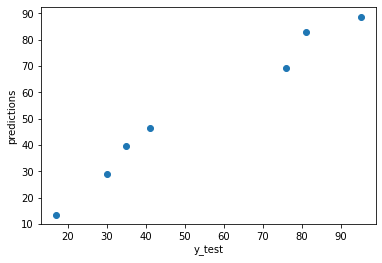

In [36]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

Text(0.5, 1.0, 'Actual VS Predicted')

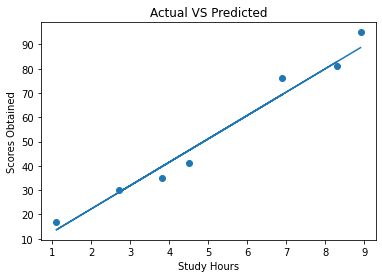

In [37]:
line = lm.coef_*X_test+lm.intercept_
plt.scatter(X_test,y_test)
plt.plot(X_test,line)
plt.xlabel('Study Hours')
plt.ylabel('Scores Obtained')
plt.title('Actual VS Predicted')

**Residual Histogram**

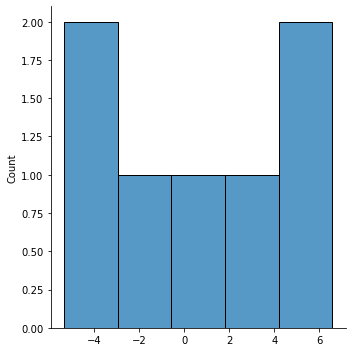

In [42]:
sns.displot((y_test-predictions),bins=5);

# Score Prediction For Study Hours = 9.25

In [39]:
Predict = lm.predict([[9.25]])
Predict

array([92.03957066])

# So if a Student studies for 9.25 Hours he would get 92.04% Marks

## Regression Evaluation Metrics


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

- **MAE** is the easiest to understand, because it's the average error.



In [40]:
from sklearn import metrics

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))


MAE: 4.156494887612261


# 
# 


# Thank You